# Simple Plot - Event - NameMoveUsingEncoder_09022020

# Measurement Data:
NameMoveUsingEncoder

### Import modules

In [14]:
from datetime import datetime, timedelta
import pandas as pd
#%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Constants relevant for the graphs

In [16]:
colors=['green','darkgreen','yellowgreen','violet','blue','red','black']
linestyles=['--','--','--','-','-','-','-']
markers=['+', "+", '+', '.','.','.','|']  # optional : marker=(8,2,0)

#### Specify file to read in

In [17]:
# Configure your input file here:
fileNameMoveUsingGyro    = "./data/MoveUsingEncoder.csv"

# Create a dataframe from measurement data in csv file
#### Set Time column as the index 

In [18]:
# Read CSV file into a pandas dataframe 
OrigDataFrame   = pd.read_csv(fileNameMoveUsingGyro);
df = OrigDataFrame.copy()
# Change timestamp to python datatime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.set_index('Time',inplace=True)
# Print the first three and last three rows of measurements
df.take([0,1,2,-3,-2,-1])

,pError,iError,dError,Output,preCalculationOutput,Measurement,Setpoint
Time,,,,,,,
1970-01-01 03:56:29,-0.480000,0.0,-0.0,-0.594400,-0.480000,943.161046,931.161046
1970-01-01 03:57:01,-0.480000,0.0,0.0,-0.594400,-0.480000,943.161046,931.161046
1970-01-01 03:57:10,-0.480000,0.0,0.0,-0.594400,-0.480000,943.161046,931.161046
1970-01-01 16:51:37,-0.047312,0.0,0.0,-0.256903,-0.047312,972.040078,970.857283
1970-01-01 16:51:57,-0.037243,0.0,0.0,-0.249050,-0.037243,971.788368,970.857283
1970-01-01 16:52:17,-0.026804,0.0,0.0,-0.240907,-0.026804,971.527370,970.857283


#### Collect the hour chunks in the data.
#### This is done to ignore the data in the log where there were no measurements.

In [19]:
# Create a list of relevant measurement periods in the data
dfDay= [group[1] for group in df.groupby(df.index.day)]
dfHourList = []
#print("Total days of measuements:", len(dfDay))
for i in range(len(dfDay)):
    dfHour = [group[1] for group in dfDay[i].groupby(dfDay[i].index.hour)]
    for j in range(len(dfHour)):
        #print("Day: ", i, "Hour: ", j)
        dfHourList.append(dfHour[j])
# Show the range of the time stamps
print("The following hour long chunks were identified:")
for i in range(len(dfHourList)):
    print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
print("Total hours", len(dfHourList))

The following hour long chunks were identified:
Month  1 Day  1 Hour  3
Month  1 Day  1 Hour  4
Month  1 Day  1 Hour  6
Month  1 Day  1 Hour  15
Month  1 Day  1 Hour  16
Total hours 5


# Plot the columns during the observational period
### labels = ['pError', 'iError', 'dError']
### timeslices = second

In [20]:
# Configure what you want to see:
#labels=dfHourList[0].columns # Set to whatever columns you want to see or all
#labeliz = ['pError', 'iError', 'dError', 'Output', 'preCalculationOutput','Measurement', 'Setpoint']
labeliz = ['pError', 'iError', 'dError']
dfHourListiz=[dfHourList[1]]  # To see specific hours change this to be = dfHourList
#dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourLis
coloriz=colors
markeriz=markers
linestyleiz=linestyles
resample=0  # 0 or 1

Month  1 Day  1 Hour 4


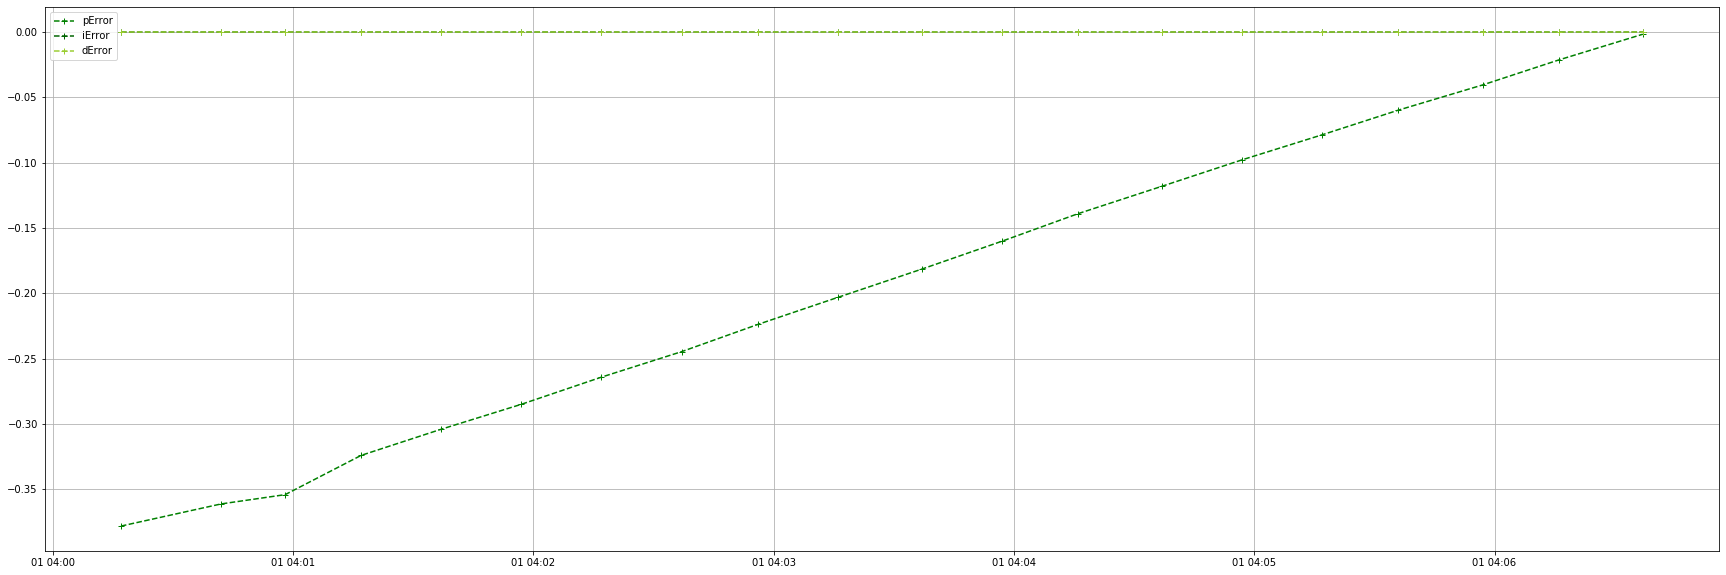

In [21]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            #print(labeliz[j],dfHourListiz[i][labeliz[j]])
            ax.plot(dfHourListiz[i].index,dfHourListiz[i][labeliz[j]],c=coloriz[j],marker=markeriz[j],ls=linestyleiz[j],label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourListiz[i].resample('s').mean().index,dfHourListiz[i][labelsiz[j]].resample('s').mean(),c=coloriz[j],marker=markeriz[j],ls=labeliz[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourListiz[i].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)
    ax.set_title(title)
    plt.show()

# Plot the columns during the observational period
### labels = ['Output', 'preCalculationOutput','Measurement', 'Setpoint']
### slices=5th

In [34]:
# Configure what you want to see:
#labels=dfHourList[0].columns # Set to whatever columns you want to see or all
#labeliz = ['pError', 'iError', 'dError', 'Output', 'preCalculationOutput','Measurement', 'Setpoint']
labeliz = ['Output', 'preCalculationOutput','Measurement', 'Setpoint']
dfHourListiz=[dfHourList[4]] # To see specific hours change this to be = dfHourList
#dfHourListiz=dfHourList     # To see them all hours change this to be = dfHourLis
coloriz=colors
markeriz=markers
linestyleiz=linestyles
resample=0  # 0 or 1

Month  1 Day  1 Hour 16


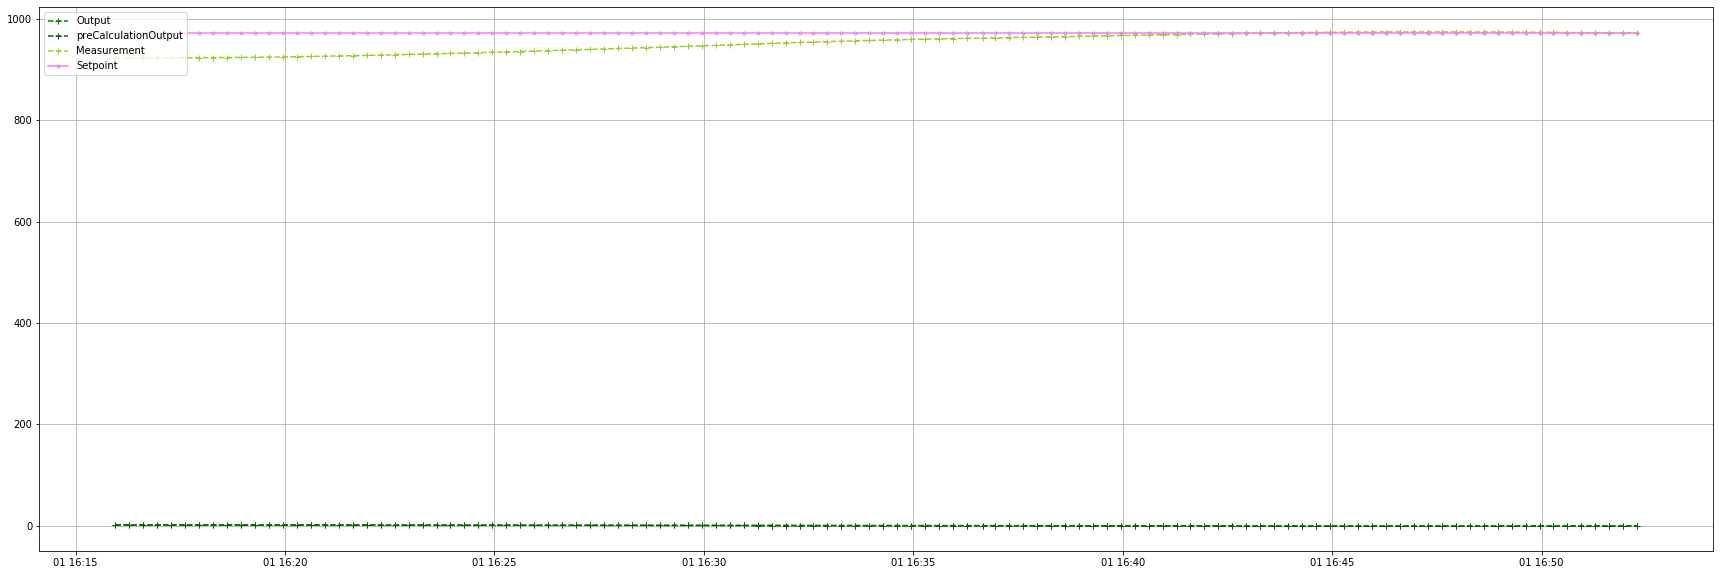

In [35]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            #print(labeliz[j],dfHourListiz[i][labeliz[j]])
            ax.plot(dfHourListiz[i].index,dfHourListiz[i][labeliz[j]],c=coloriz[j],marker=markeriz[j],ls=linestyleiz[j],label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourListiz[i].resample('s').mean().index,dfHourListiz[i][labelsiz[j]].resample('s').mean(),c=coloriz[j],marker=markeriz[j],ls=labeliz[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourListiz[i].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)
    ax.set_title(title)
    plt.show()

# Plot the columns during the observational period
### labels (all)= ['pError', 'iError', 'dError','Output', 'preCalculationOutput','Measurement', 'Setpoint']
### timeslines (all)

In [39]:
# Configure what you want to see:
#labels=dfHourList[0].columns # Set to whatever columns you want to see or all
labeliz = ['pError', 'iError', 'dError', 'Output', 'preCalculationOutput','Measurement', 'Setpoint']
#dfHourListiz=[dfHourList[0]]  # To see specific hours change this to be = dfHourList
dfHourListiz=dfHourList   # To see them all hours change this to be = dfHourLis
coloriz=colors
markeriz=markers
linestyleiz=linestyles
resample=0  # 0 or 1

Month  1 Day  1 Hour 3


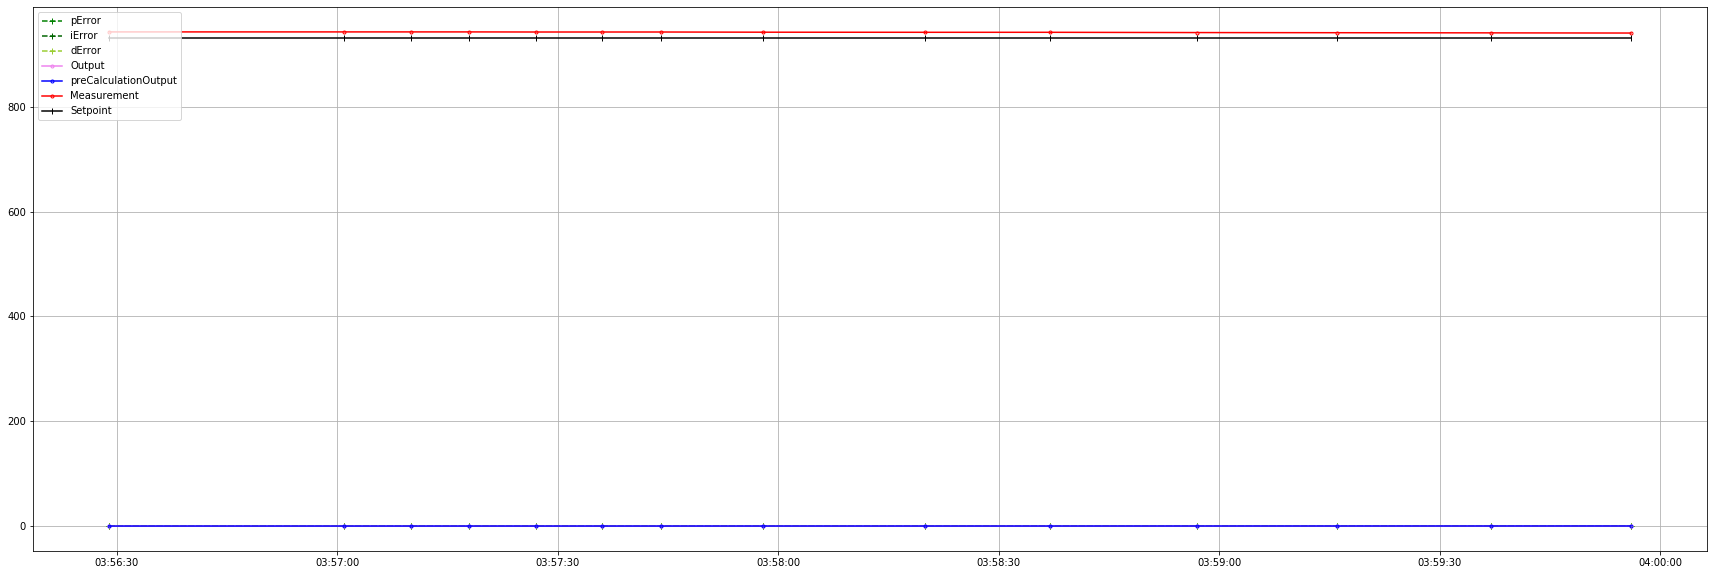

Month  1 Day  1 Hour 4


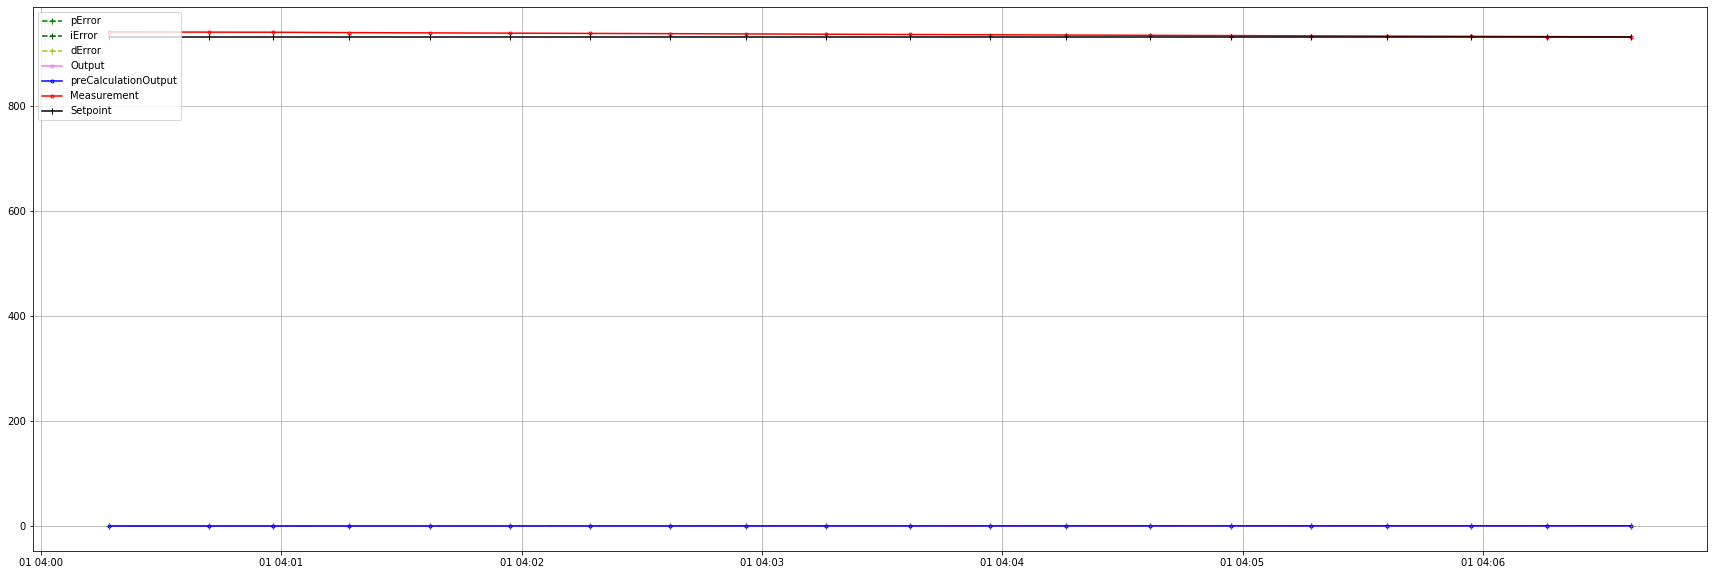

Month  1 Day  1 Hour 6


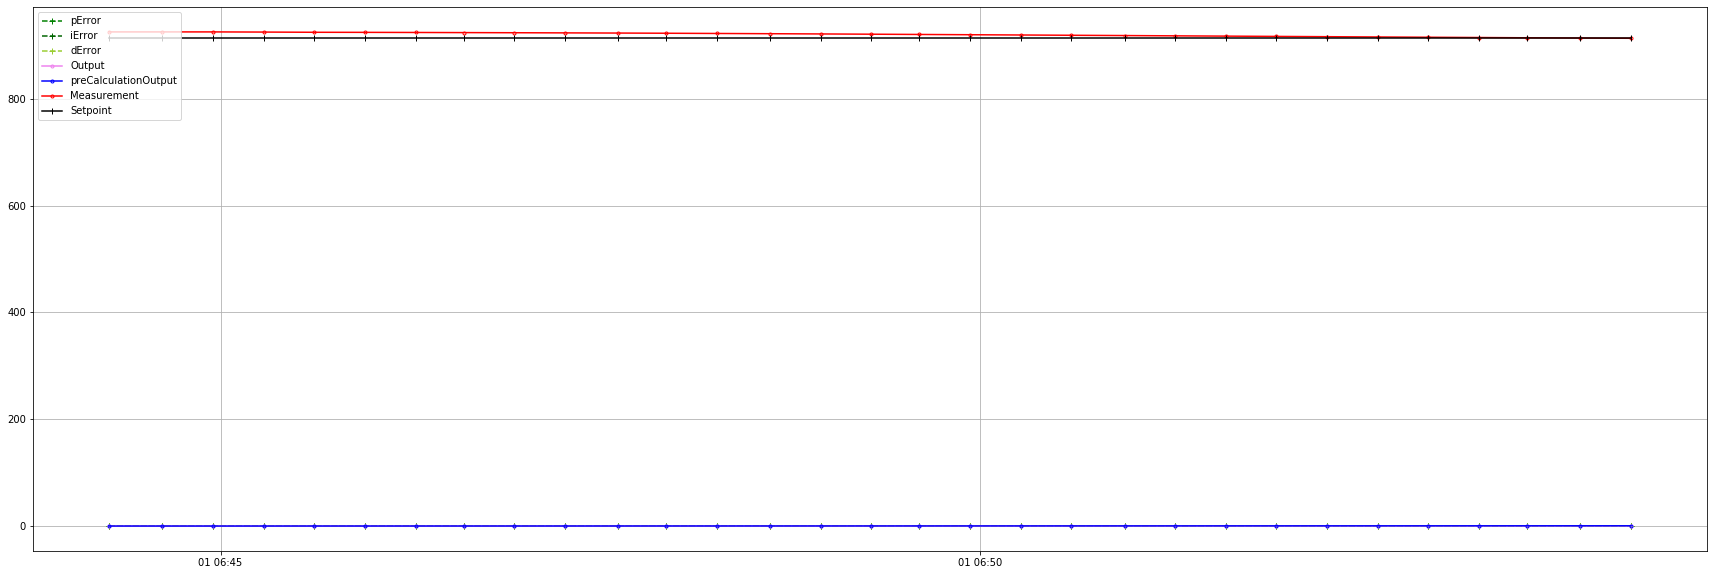

Month  1 Day  1 Hour 15


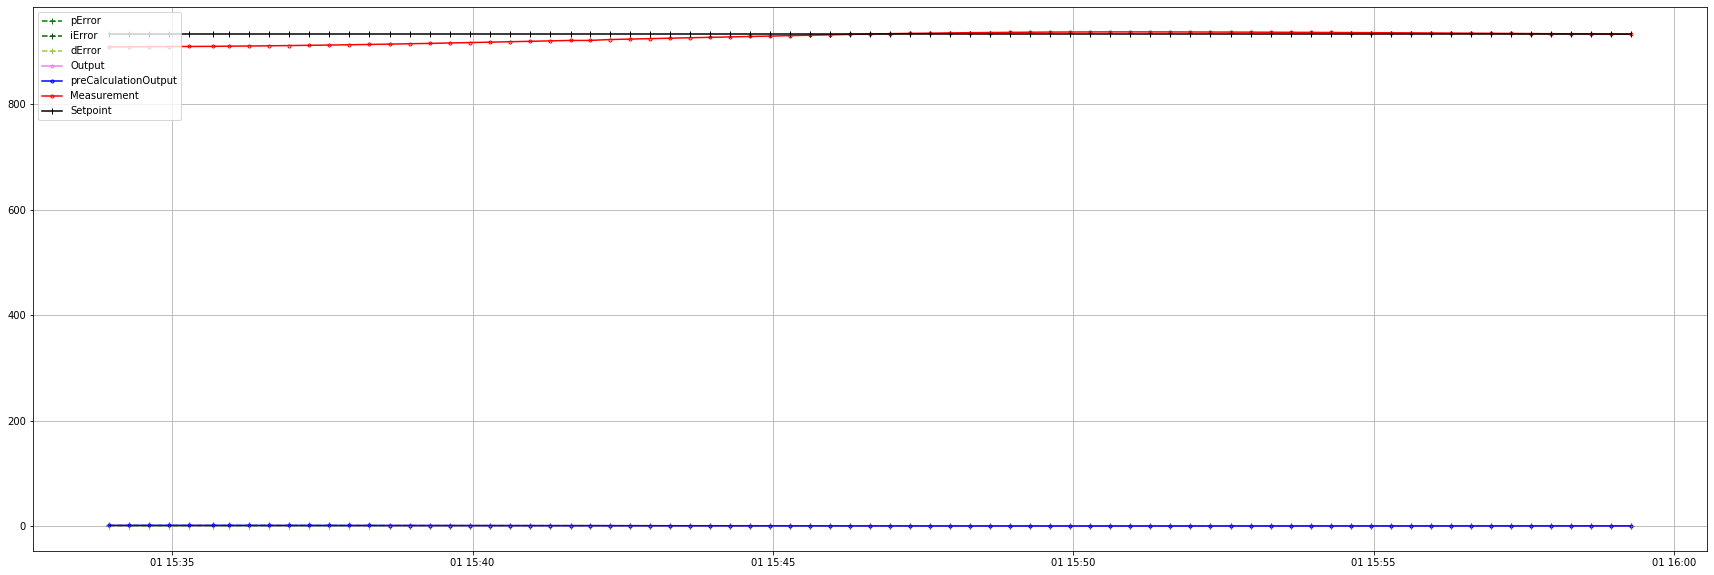

Month  1 Day  1 Hour 16


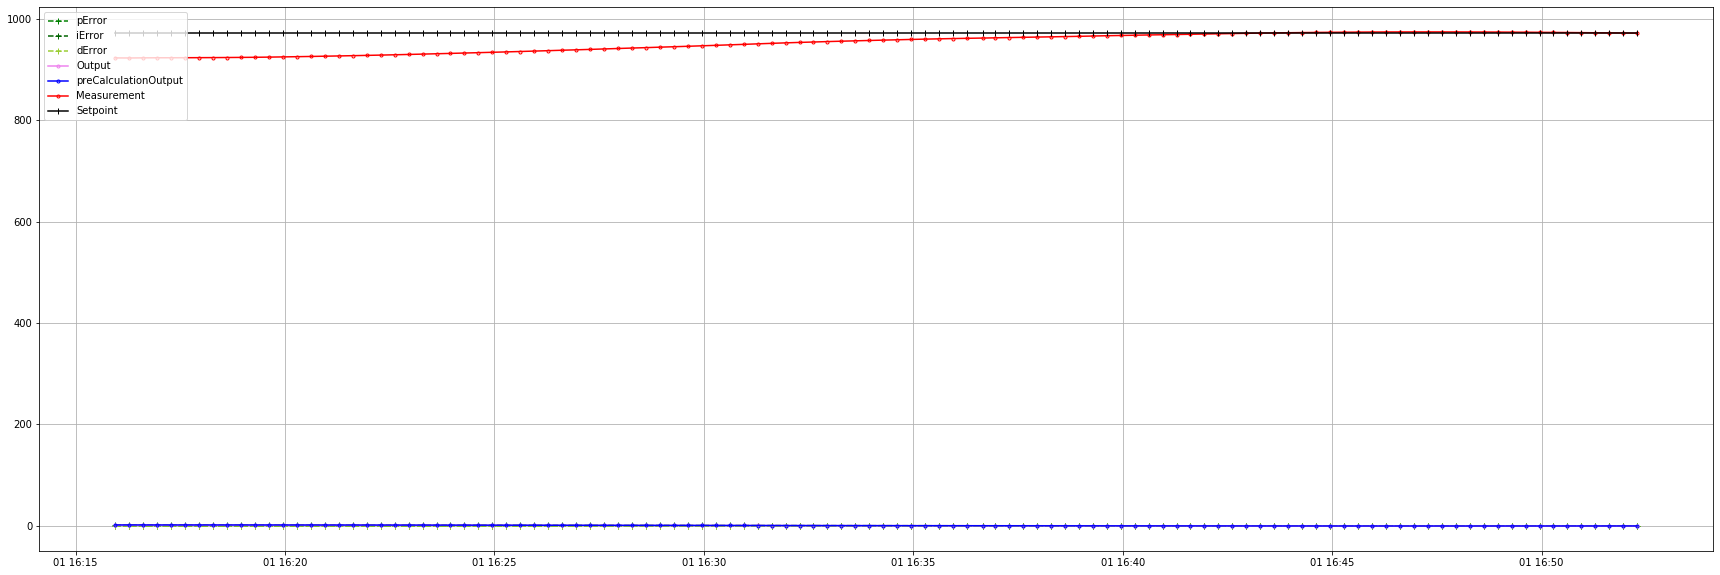

In [40]:
for i in range(len(dfHourListiz)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labeliz)):
        if resample==0:
            #print(labeliz[j],dfHourListiz[i][labeliz[j]])
            ax.plot(dfHourListiz[i].index,dfHourListiz[i][labeliz[j]],c=coloriz[j],marker=markeriz[j],ls=linestyleiz[j],label=labeliz[j],fillstyle='none')
        elif resample==1:
            ax.plot(dfHourListiz[i].resample('s').mean().index,dfHourListiz[i][labelsiz[j]].resample('s').mean(),c=coloriz[j],marker=markeriz[j],ls=labeliz[j],label=labeliz[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourListiz[i].index[0].month,"Day ",dfHourListiz[i].index[0].day,"Hour",dfHourListiz[i].index[0].hour)
    ax.set_title(title)
    plt.show()